# StockWave

**Librerias utilizadas**

In [1]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import json

from dotenv import load_dotenv
import os 

In [3]:
echo API_KEY=Q2HJQNW5RCKVC1WW > .env

In [5]:
load_dotenv()

True

In [7]:
my_key = os.getenv("API_KEY")
my_key

'Q2HJQNW5RCKVC1WW'

**Realizamos la llamada a nuestra API Alpha_Vantage**

In [12]:
#aqui solo me trae de 100 dias si quiero de los ultimos 20 a;os deberia poner full:


url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey={my_key}'
r = requests.get(url)
data = r.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2024-10-31', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-10-31': {'1. open': '229.3400', '2. high': '229.8300', '3. low': '225.3700', '4. close': '225.9100', '5. volume': '64370086'}, '2024-10-30': {'1. open': '232.6100', '2. high': '233.4700', '3. low': '229.5500', '4. close': '230.1000', '5. volume': '47070907'}, '2024-10-29': {'1. open': '233.1000', '2. high': '234.3250', '3. low': '232.3200', '4. close': '233.6700', '5. volume': '35417247'}, '2024-10-28': {'1. open': '233.3200', '2. high': '234.7300', '3. low': '232.5500', '4. close': '233.4000', '5. volume': '36087134'}, '2024-10-25': {'1. open': '229.7400', '2. high': '233.2200', '3. low': '229.5700', '4. close': '231.4100', '5. volume': '38802304'}, '2024-10-24': {'1. open': '229.9800', '2. high': '230.8200', '3. low': '228.4100', '4. close': '230.5700', 

**Extracción de datos**

Le digo que me traiga de mi data(obtenida en la llamada) los datos que tenemos en "Time Series (Daily) porque es mi key donde tenemos como value los diccionarios que contienen las fechas e informacion de los precios y volumen.


In [14]:
if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
time_series

{'2024-10-31': {'1. open': '229.3400',
  '2. high': '229.8300',
  '3. low': '225.3700',
  '4. close': '225.9100',
  '5. volume': '64370086'},
 '2024-10-30': {'1. open': '232.6100',
  '2. high': '233.4700',
  '3. low': '229.5500',
  '4. close': '230.1000',
  '5. volume': '47070907'},
 '2024-10-29': {'1. open': '233.1000',
  '2. high': '234.3250',
  '3. low': '232.3200',
  '4. close': '233.6700',
  '5. volume': '35417247'},
 '2024-10-28': {'1. open': '233.3200',
  '2. high': '234.7300',
  '3. low': '232.5500',
  '4. close': '233.4000',
  '5. volume': '36087134'},
 '2024-10-25': {'1. open': '229.7400',
  '2. high': '233.2200',
  '3. low': '229.5700',
  '4. close': '231.4100',
  '5. volume': '38802304'},
 '2024-10-24': {'1. open': '229.9800',
  '2. high': '230.8200',
  '3. low': '228.4100',
  '4. close': '230.5700',
  '5. volume': '31109503'},
 '2024-10-23': {'1. open': '234.0800',
  '2. high': '235.1440',
  '3. low': '227.7600',
  '4. close': '230.7600',
  '5. volume': '52286979'},
 '2024

In [16]:
type(time_series)

dict

**Extracción de columnas y creación del DataFrame**

Podemos ver que nuestra informacion esta dentro de un diccionario, por lo cual extraemos cada columna.
Vemos que el key es la fecha y el value son todos los valores diarios, como precios y volumen entonces entraremos en cada key-value para traernos
la informacion en columnas


In [18]:
records = [] #Lista vacia donde agregaremos los datos que extraemos de nuestro diccionario.

for date, daily_data in time_series.items():
    record = {"Date": date,
              "Open": float(daily_data["1. open"]), #convertimos directamente este dato en float para poder hacer operaciones matematicas despues.
              "High": float(daily_data["2. high"]),
              "Low": float(daily_data["3. low"]),
              "Close": float(daily_data["4. close"])}
    records.append(record)
df = pd.DataFrame(records)

**Guardamos los datos de 20 años para futuros trabajos**

In [20]:
#df.to_csv('AAPL_20años_30octubre.csv') 

**Limpiamos las fechas** 

Acomodamos del día más antiguo al más reciente y transformando la columna date a formato fecha.

In [24]:
#aqui llamamos a nuestro csv que ya tenemos guardado en caso de haber utilizado el limite de nuestras 25 llamadas.
#df = pd.read_csv("C:/Users/astri/Ironhack/First proyect/AAPL_20años_30oct.csv") 

In [29]:
#Recordemos que nuestro DF incluye la información de los ultimos 20 años.
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)

**Reseteamos el INDEX y creo un DF nuevo por control**


In [31]:
df1 = df.reset_index(drop=True)
df1


,Unnamed: 0,Date,Open,High,Low,Close
0,6289,1999-11-01,80.00,80.690,77.37,77.62
1,6288,1999-11-02,78.00,81.690,77.31,80.25
2,6287,1999-11-03,81.62,83.250,81.00,81.50
3,6286,1999-11-04,82.06,85.370,80.62,83.62
4,6285,1999-11-05,84.62,88.370,84.00,88.31
...,...,...,...,...,...,...
6285,4,2024-10-24,229.98,230.820,228.41,230.57
6286,3,2024-10-25,229.74,233.220,229.57,231.41
6287,2,2024-10-28,233.32,234.730,232.55,233.40
6288,1,2024-10-29,233.10,234.325,232.32,233.67


**Cálculo de medias moviles**


En este punto usamos Rolling para indicarle que queremos un conjunto de 20 días y 50 días. Rolling nos ayuda a indicar que cada 20 dias (es la ventana) vuelve a calcular el promedio. La funcion de Rolling nos deja aplicar una funcion sobre la ventana que dejemos especificada.



In [33]:
#Cálculo las medias móviles para agregarlas en una nueva columna.

df1['MM20'] = df1['Close'].rolling(window=20).mean()
df1['MM50'] = df1['Close'].rolling(window=50).mean()

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  6290 non-null   int64         
 1   Date        6290 non-null   datetime64[ns]
 2   Open        6290 non-null   float64       
 3   High        6290 non-null   float64       
 4   Low         6290 non-null   float64       
 5   Close       6290 non-null   float64       
 6   MM20        6271 non-null   float64       
 7   MM50        6241 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 393.3 KB


**Selecciono el periodo de solo 2 años**

Como ya tenemos las fechas en el formato correcto podemos hacer operaciones con ellas.
En la biblioteca de python:https://docs.python.org/es/3/library/datetime.html#datetime.datetime.now nos indican que podemos usar un timestamp.now para
timestamp nos da el dia y le estamos indicando con el now que se el dia de hoy la base - dateoffset (no permite movernos en el tiempo, en este caso
dos años atrás, podemos movernos en días, meses y años.


In [37]:
two_years = pd.Timestamp.now() - pd.DateOffset(years=2)
df_2year= df1[df1['Date'] >= two_years]

#Reseteamos el índice
df_2year.reset_index(drop=True, inplace=True)



**Guardamos el df de 2 años por si nos acabamos las llamadas**

In [39]:
#df_2year.to_csv('AAPL_2años_1nov.csv', index=False) #esto es para guardar el df por control en un csv.

Verificamos que nuestros datos están en los formatos correctos

In [41]:
df_2year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  501 non-null    int64         
 1   Date        501 non-null    datetime64[ns]
 2   Open        501 non-null    float64       
 3   High        501 non-null    float64       
 4   Low         501 non-null    float64       
 5   Close       501 non-null    float64       
 6   MM20        501 non-null    float64       
 7   MM50        501 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 31.4 KB


**Identificamos cuáles fueron los 5 precios más altos y los 5 precios más bajos**

In [43]:
top_5_highest = df_2year.nlargest(5, 'High')
top_5_lowest = df_2year.nsmallest(5, 'Low')

print(f"Los 5 precios mas altos que tuvo la acción de AAPL en los últimos 2 años fueron:{top_5_highest[['Date', 'High']]})")

print(f"Los 5 precios mas bajos que tuvo la acción de AAPL en los últimos 2 años fueron:{top_5_lowest[['Date', 'High']]})")


Los 5 precios mas altos que tuvo la acción de AAPL en los últimos 2 años fueron:          Date    High
489 2024-10-15  237.49
424 2024-07-15  237.23
493 2024-10-21  236.85
425 2024-07-16  236.27
494 2024-10-22  236.22)
Los 5 precios mas bajos que tuvo la acción de AAPL en los últimos 2 años fueron:         Date      High
41 2023-01-03  130.9000
43 2023-01-05  127.7700
44 2023-01-06  130.2900
42 2023-01-04  128.6557
38 2022-12-28  131.0275)


In [87]:
#si nos hemos traido el csv entonces le borramos la columna extra que se nos ha creado con un indice
#df_2year = df_2year.drop('Unnamed: 0', axis=1)


**Cálculo de volatilidad con los precios de cierre**

In [59]:
#volatilidad diaria de Apple, hacemos una copia del df.
df_vol = df_2year
# Desplazamos la columna 'Close' hacia abajo en una nueva columna para representar el precio de cierre del día anterior, el primer valor sera NAN
#porque no tenemos día anterior, usamos shift para indicarle cuantos espacios quiero dezplazar hacia abajo si quisiera lo contrario seria con -1

df_vol['Previous_Close'] = df_vol['Close'].shift(1)

# Cálculamos el retorno diario
df_vol['Daily_Return'] = (df_vol['Close'] - df_vol['Previous_Close']) / df_vol['Previous_Close']
df_vol



,Date,Open,High,Low,Close,MM20,MM50,Previous_Close,Daily_Return
0,2022-11-02,148.945,152.170,145.000,145.03,145.3005,150.6542,NaN,NaN
1,2022-11-03,142.060,142.800,138.750,138.88,144.9730,150.0812,145.03,-0.042405
2,2022-11-04,142.090,142.670,134.380,138.38,144.8875,149.4482,138.88,-0.003600
3,2022-11-07,137.110,139.145,135.671,138.92,144.8125,148.9542,138.38,0.003902
4,2022-11-08,140.410,141.430,137.490,139.50,144.8385,148.5166,138.92,0.004175
...,...,...,...,...,...,...,...,...,...
496,2024-10-24,229.980,230.820,228.410,230.57,229.8795,226.6678,230.76,-0.000823
497,2024-10-25,229.740,233.220,229.570,231.41,230.0605,226.8016,230.57,0.003643
498,2024-10-28,233.320,234.730,232.550,233.40,230.0805,226.9486,231.41,0.008599
499,2024-10-29,233.100,234.325,232.320,233.67,230.4535,227.1042,233.40,0.001157


**Graficamos nuestros resultados para ver si existe una tendencia**

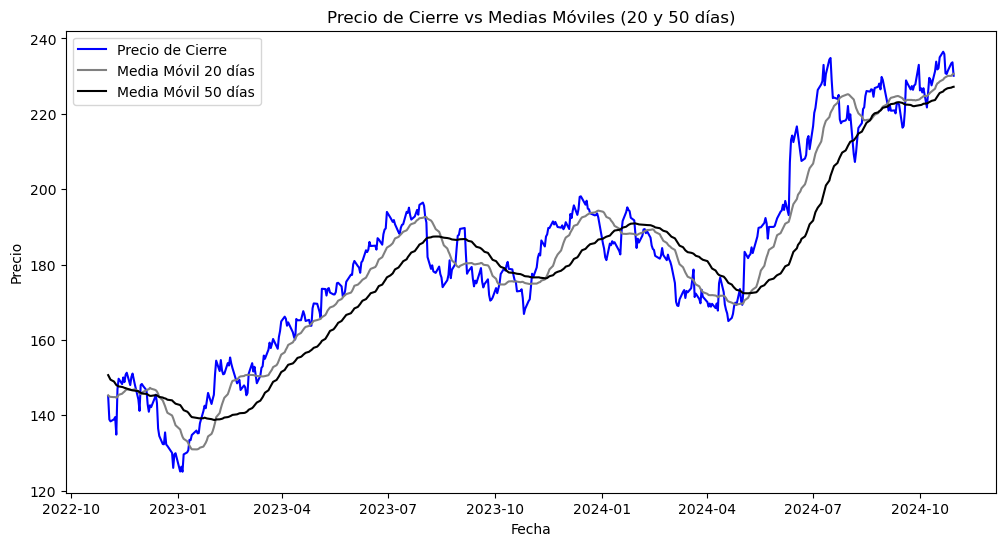

In [57]:
plt.figure(figsize=(12, 6))

plt.plot(df_2year['Date'], df_2year['Close'], label='Precio de Cierre', color='blue')
plt.plot(df_2year['Date'], df_2year['MM20'], label='Media Móvil 20 días', color='gray')
plt.plot(df_2year['Date'], df_2year['MM50'], label='Media Móvil 50 días', color='black')


plt.title('Precio de Cierre vs Medias Móviles (20 y 50 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio')

plt.legend()
plt.show()


**Cálculo la volatilidad en base a nuestra columna**

In [91]:
vol_daily = df_vol.Daily_Return.std()
vol_daily = round((vol_daily* 100),3)

El 0.01504315622368215 se considera una volatilidad moderada porque es menor a un 2% que se considera muy volatil en el mercado.

**Groupby Mes**

Creamos un nuevo DF con la columna de fechas y precios de cierre para poder aplicar un group by = mes y poder calcular el precio de cierre medio por mes, después veremos en qué mes y año fue el precio de cierre más bajo y el precio de cierre más alto.

In [63]:
cols = ['Date', 'Close']
df2 = df_2year[cols]
df2['Date'] = pd.to_datetime(df2['Date'])
df2

C:\Users\astri\AppData\Local\Temp\ipykernel_3576\3644435979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


,Date,Close
0,2022-11-02,145.03
1,2022-11-03,138.88
2,2022-11-04,138.38
3,2022-11-07,138.92
4,2022-11-08,139.50
...,...,...
496,2024-10-24,230.57
497,2024-10-25,231.41
498,2024-10-28,233.40
499,2024-10-29,233.67


Vamos a extraer el mes y año de nuestra fecha para poder crear una nueva columna con estos valores y después aplicar un groupby.

In [65]:
df2["Month"] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
df2

C:\Users\astri\AppData\Local\Temp\ipykernel_3576\1825588685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2['Date'].dt.month
C:\Users\astri\AppData\Local\Temp\ipykernel_3576\1825588685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Date'].dt.year


,Date,Close,Month,Year
0,2022-11-02,145.03,11,2022
1,2022-11-03,138.88,11,2022
2,2022-11-04,138.38,11,2022
3,2022-11-07,138.92,11,2022
4,2022-11-08,139.50,11,2022
...,...,...,...,...
496,2024-10-24,230.57,10,2024
497,2024-10-25,231.41,10,2024
498,2024-10-28,233.40,10,2024
499,2024-10-29,233.67,10,2024



Aplicó la media por año y mes al precio de cierre y guarde esta información en un nuevo DF.


In [67]:
df_3 = df2.groupby(['Year', 'Month'])['Close'].mean().astype(int).reset_index()
df_3

,Year,Month,Close
0,2022,11,145
1,2022,12,137
2,2023,1,135
3,2023,2,150
4,2023,3,154
5,2023,4,165
6,2023,5,172
7,2023,6,184
8,2023,7,192
9,2023,8,181


Ya que tenemos nuestro nuevo df podemos pedir que nos traiga el precio de cierre promedio más bajo y el más alto.

In [69]:
highest = df_3.nlargest(1, 'Close')
lowest = df_3.nsmallest(1, 'Close')


print(f"El precio más alto por mes en promedio fue:{highest}")
print(f"El precio más bajo por mes en promedio fue:{lowest}")


El precio más alto por mes en promedio fue:    Year  Month  Close
23  2024     10    230
El precio más bajo por mes en promedio fue:   Year  Month  Close
2  2023      1    135


**Comparación de los precios de cierre de AAPL vs MSFT**



Nos traemos el df de MSFT a dos años para comparar el movimiento de los precios.

In [71]:
df_msft = pd.read_csv("C:/Users/astri/Ironhack/First proyect/microsoft_2años.csv")


In [73]:
df_msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    502 non-null    object 
 1   Open    502 non-null    float64
 2   High    502 non-null    float64
 3   Low     502 non-null    float64
 4   Close   502 non-null    float64
 5   MM20    502 non-null    float64
 6   MM50    502 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.6+ KB


Pasamos la coulumna de fechas en formato fecha y reiniciamos el index

In [75]:
df_msft["Date"] = pd.to_datetime(df_msft["Date"])
df_msft.sort_values("Date", inplace=True)

In [77]:
df_msft = df_msft.reset_index(drop=True)
df_msft

,Date,Open,High,Low,Close,MM20,MM50
0,2022-11-02,229.460,231.30,220.0400,220.10,234.3635,244.8080
1,2022-11-03,220.090,220.41,213.9800,214.25,232.7365,243.5772
2,2022-11-04,217.550,221.59,213.4310,221.39,232.0940,242.4280
3,2022-11-07,221.990,228.41,221.2800,227.87,232.0250,241.6236
4,2022-11-08,228.700,231.65,225.8400,228.87,232.1980,240.8964
...,...,...,...,...,...,...,...
497,2024-10-25,426.760,432.52,426.5650,428.15,419.3620,420.6214
498,2024-10-28,431.655,431.94,426.3000,426.59,419.1765,420.7838
499,2024-10-29,428.000,433.17,425.8001,431.95,419.7395,420.9922
500,2024-10-30,437.435,438.50,432.1000,432.53,420.5095,421.1468


Verificamos que todas nuestras fechas esten realmente en formato fecha.

In [79]:
df_2year['Date'] = pd.to_datetime(df_2year['Date'], errors='coerce')
df_msft['Date'] = pd.to_datetime(df_msft['Date'], errors='coerce')

Calculamos la volatilidad de Microsoft para compararla contra la volatilidad de Apple.

In [81]:
df_vol_msft = df_msft
# Desplazamos la columna 'Close' hacia abajo en una nueva columna para representar el precio de cierre del día anterior, el primer valor sera NAN
#porque no tenemos día anterior, usamos shift para indicarle cuantos espacios quiero dezplazar hacia abajo si quisiera lo contrario seria con -1

df_vol_msft['Previous_Close'] = df_vol_msft['Close'].shift(1)

# Cálculamos el retorno diario
df_vol_msft['Daily_Return'] = (df_vol_msft['Close'] - df_vol_msft['Previous_Close']) / df_vol_msft['Previous_Close']
df_vol_msft

,Date,Open,High,Low,Close,MM20,MM50,Previous_Close,Daily_Return
0,2022-11-02,229.460,231.30,220.0400,220.10,234.3635,244.8080,NaN,NaN
1,2022-11-03,220.090,220.41,213.9800,214.25,232.7365,243.5772,220.10,-0.026579
2,2022-11-04,217.550,221.59,213.4310,221.39,232.0940,242.4280,214.25,0.033326
3,2022-11-07,221.990,228.41,221.2800,227.87,232.0250,241.6236,221.39,0.029270
4,2022-11-08,228.700,231.65,225.8400,228.87,232.1980,240.8964,227.87,0.004388
...,...,...,...,...,...,...,...,...,...
497,2024-10-25,426.760,432.52,426.5650,428.15,419.3620,420.6214,424.73,0.008052
498,2024-10-28,431.655,431.94,426.3000,426.59,419.1765,420.7838,428.15,-0.003644
499,2024-10-29,428.000,433.17,425.8001,431.95,419.7395,420.9922,426.59,0.012565
500,2024-10-30,437.435,438.50,432.1000,432.53,420.5095,421.1468,431.95,0.001343


Ahora usamos desviación estándar para saber la volatilidad de los dos años y hacemos un print donde nos dé un consejo dependiendo si la volatilidad de Microsoft es mayor o menor a la volatilidad de Apple


In [95]:
vol_daily_msft = df_vol_msft.Daily_Return.std()
vol_daily_msft = round((vol_daily_msft* 100),3)

if vol_daily_msft > vol_daily:
    
    print(f"La volatilidad de Microsoft {vol_daily_msft}% es mayor a la de Apple {vol_daily}%, \n seria buena inversión para una persona de riesgo medio-alto")
else:
    print(f"La volatilidad de Microsoft {vol_daily_msft}% es menor a la de Apple {vol_daily}%, \n seria buena inversión para una persona de riesgo medio-bajo")

La volatilidad de Microsoft 1.528% es mayor a la de Apple 1.496%, 
 seria buena inversión para una persona de riesgo medio-alto


**Realizamos un plot para comparar la acción de Apple vs la acción de Microsoft**

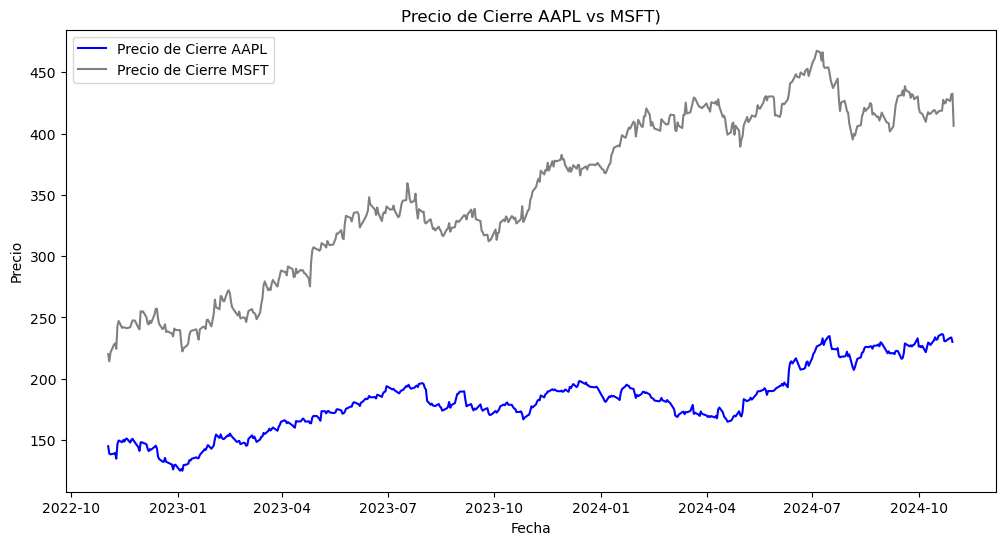

In [85]:
plt.figure(figsize=(12, 6))

plt.plot(df_2year['Date'], df_2year['Close'], label='Precio de Cierre AAPL', color='blue')
plt.plot(df_msft['Date'], df_msft['Close'], label='Precio de Cierre MSFT', color='gray')



plt.title('Precio de Cierre AAPL vs MSFT)')
plt.xlabel('Fecha')
plt.ylabel('Precio')

plt.legend()
plt.show()